# Задание:

    Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    Разделите данные на выборку для обучения и тестирования
    Постройте модель LDA
    Визуализируйте предсказания для тестовой выборки и центры классов
    Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    Подберите оптимальное число кластеров для алгоритма k-means и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# запись в dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
variety = iris.target
df = data[['sepal length (cm)', 'sepal width (cm)']]
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [4]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# разделение данных

X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size = 0.30)
len(y_test)

45

In [6]:
# построение LDA

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

accuracy_score(y_test, lda.predict(X_test))

0.7555555555555555

[[5.04615385 3.47948718]
 [5.84117647 2.69705882]
 [6.603125   3.0125    ]]


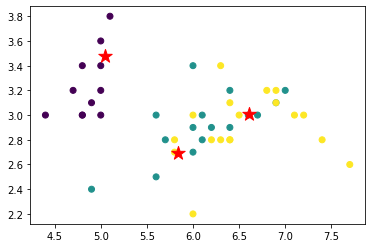

In [7]:
#  визуализация предсказания для тестовой выборки

plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c = y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1],  c = 'r', s = 200, marker = '*')
print(lda.means_)

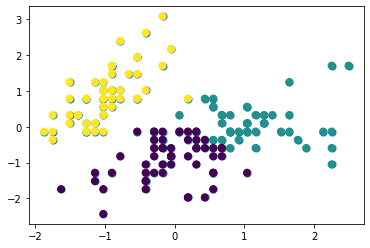

In [8]:
# масштабирование данных

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s = 50)

# k-means
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, s=  50)

In [9]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# кросс-валидация (то есть при обучении модели данные разбиваются множеством разных способов и считается условно “усредненный” лучший результат)
scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8257575757575759
